In [1]:
import pandas as pd
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from IPython.core.display import HTML
import plotly.express as px
import plotly as px

In [2]:
#carregando os dados
copas = pd.read_csv('copas.csv')
partidas = pd.read_csv('partidas.csv')

In [3]:
copas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ano_copa                  21 non-null     int64 
 1   desc_copa                 21 non-null     object
 2   img_logo                  21 non-null     object
 3   sede                      21 non-null     object
 4   campeao                   21 non-null     object
 5   img_campeao               21 non-null     object
 6   2nd                       21 non-null     object
 7   img_2nd                   21 non-null     object
 8   3nd                       21 non-null     object
 9   img_3nd                   21 non-null     object
 10  4nd                       21 non-null     object
 11  img_4nd                   21 non-null     object
 12  gols_marcados_copa        21 non-null     int64 
 13  quant_participantes_copa  21 non-null     int64 
 14  quant_partidas_copa       21

In [4]:
#converte tipo de dados das colunas
copas['ano_copa'] = copas['ano_copa'].astype(str)
copas['tec_codTecnicoCampeao'] = copas['tec_codTecnicoCampeao'].astype(str)
copas['tec_codTecnico2nd'] = copas['tec_codTecnico2nd'].astype(str)
copas['tec_codTecnico3nd'] = copas['tec_codTecnico3nd'] .astype(str)
copas['tec_codTecnico4nd'] = copas['tec_codTecnico4nd'].astype(str)
copas['publico_copa'] = copas['publico_copa'].apply(lambda x: str(x).replace(".",""))
copas['publico_copa'] = copas['publico_copa'].astype('int64')

partidas['ano_copa'] = partidas['ano_copa'].astype(str)
partidas['id_partida'] = partidas['id_partida'].astype(str)
#partidas['placar'] = partidas['placar'].astype(str)

#inserindo colunas
copas['ano_copa_sede'] = copas['ano_copa']+" - "+copas['sede']
copas['gols_partida'] = copas['gols_marcados_copa'] / copas['quant_partidas_copa']

partidas['ref_fase_grupo'] = partidas['tipo_fase'] + " - " + partidas['fase_grupo']
partidas['gols_na_partida'] = partidas['gols_time1'] + partidas['gols_time2']

#tipo de dados das colunas
partidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_partida       900 non-null    object 
 1   ano_copa         900 non-null    object 
 2   data_hora        900 non-null    object 
 3   id_fase          900 non-null    int64  
 4   fase_grupo       900 non-null    object 
 5   tipo_fase        900 non-null    object 
 6   id_estadio       900 non-null    int64  
 7   id_time1         900 non-null    int64  
 8   time1            900 non-null    object 
 9   img_time1        900 non-null    object 
 10  gols_time1       900 non-null    int64  
 11  placar           900 non-null    object 
 12  gols_time2       900 non-null    int64  
 13  id_time2         900 non-null    int64  
 14  time2            900 non-null    object 
 15  img_time2        900 non-null    object 
 16  win_conditions   836 non-null    object 
 17  publico_partida 

In [5]:
#ordenando a lista
list_ano_copa = copas['ano_copa'].values.tolist()
list_ano_copa= sorted(list_ano_copa, reverse=True)
print(list_ano_copa)

['2018', '2014', '2010', '2006', '2002', '1998', '1994', '1990', '1986', '1982', '1978', '1974', '1970', '1966', '1962', '1958', '1954', '1950', '1938', '1934', '1930']


In [6]:
selected_copa = str(2018)
df_partidas = partidas.loc[partidas['ano_copa'] == selected_copa]
logo_copa=df_partidas.iloc[0]['data_hora']

def path_to_image_html(path):
    return '<img src="'+ path + '" width="50" >'

df_partidas = df_partidas.rename(columns={'img_time1': 'img', 'img_time2': 'img'})
HTML(df_partidas.to_html(escape=False, formatters=dict(img=path_to_image_html)))

,id_partida,ano_copa,data_hora,id_fase,fase_grupo,tipo_fase,id_estadio,id_time1,time1,img,gols_time1,placar,gols_time2,id_time2,time2,img,win_conditions,publico_partida,arbitro,assistente1,assistente2,ref_fase_grupo,gols_na_partida
836,300331503,2018,14 Jun 2018 - 18:00,2010,Grupo A,Fase de Grupos,182,16,RUS,,5,5-0,0,71,KSA,,NaN,78011.0,PITANA Nestor (ARG),MAIDANA Hernan (ARG),BELATTI Juan Pablo (ARG),Fase de Grupos - Grupo A,5
837,300353632,2018,15 Jun 2018 - 17:00,2010,Grupo A,Fase de Grupos,183,38,EGY,,0,0-1,1,1,URU,,NaN,27015.0,KUIPERS Bjorn (NED),VAN ROEKEL Sander (NED),ZEINSTRA Erwin (NED),Fase de Grupos - Grupo A,1
838,300331526,2018,15 Jun 2018 - 18:00,2020,Grupo B,Fase de Grupos,184,54,MAR,,0,0-1,1,48,IRN,,NaN,62548.0,CAKIR Cuneyt (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),Fase de Grupos - Grupo B,1
839,300331524,2018,15 Jun 2018 - 21:00,2020,Grupo B,Fase de Grupos,185,64,POR,,3,3-3,3,12,ESP,,NaN,43866.0,ROCCHI Gianluca (ITA),DI LIBERATORE Elenito (ITA),TONOLINI Mauro (ITA),Fase de Grupos - Grupo B,6
840,300331533,2018,16 Jun 2018 - 13:00,2030,Grupo C,Fase de Grupos,186,3,FRA,,2,2-1,1,20,AUS,,NaN,41279.0,CUNHA Andres (URU),TARAN Nicolas (URU),ESPINOSA Mauricio (URU),Fase de Grupos - Grupo C,3
841,300331515,2018,16 Jun 2018 - 16:00,2040,Grupo D,Fase de Grupos,187,11,ARG,,1,1-1,1,47,ICE,,NaN,44190.0,MARCINIAK Szymon (POL),SOKOLNICKI Pawel (POL),LISTKIEWICZ Tomasz (POL),Fase de Grupos - Grupo D,2
842,300331528,2018,16 Jun 2018 - 19:00,2030,Grupo C,Fase de Grupos,188,62,PER,,0,0-1,1,35,DEN,,NaN,40502.0,GASSAMA Bakary (GAM),BIRUMUSHAHU Jean Claude (BDI),ETCHIALI Abdelhak (ALG),Fase de Grupos - Grupo C,1
843,300331523,2018,16 Jun 2018 - 21:00,2040,Grupo D,Fase de Grupos,189,31,CRO,,2,2-0,0,57,NGA,,NaN,31136.0,RICCI Sandro (BRA),DE CARVALHO Emerson (BRA),VAN GASSE Marcelo (BRA),Fase de Grupos - Grupo D,2
844,300331529,2018,17 Jun 2018 - 16:00,2050,Grupo E,Fase de Grupos,190,30,CRC,,0,0-1,1,74,SRB,,NaN,41432.0,DIEDHIOU Malang (SEN),CAMARA Djibril (SEN),SAMBA El Hadji (SEN),Fase de Grupos - Grupo E,1
845,300331502,2018,17 Jun 2018 - 18:00,2060,Grupo F,Fase de Grupos,182,10,GER,,0,0-1,1,9,MEX,,NaN,78011.0,FAGHANI Alireza (IRN),SOKHANDAN Reza (IRN),MANSOURI Mohammadreza (IRN),Fase de Grupos - Grupo F,1


In [7]:
def path_to_image_html(path):
    return '<img src="'+ path + '" width="50" >'

copas_img = copas[['ano_copa', 'sede', 'campeao','img_campeao', '2nd', '3nd', '4nd', 'Conta']]
HTML(copas_img.to_html(escape=False, formatters=dict(img_campeao=path_to_image_html)))

,ano_copa,sede,campeao,img_campeao,2nd,3nd,4nd,Conta
0,1930,Uruguay,Uruguay,,Argentina,USA,Yugoslavia,1
1,1934,Italy,Italy,,Czechoslovakia,Germany,Austria,1
2,1938,France,Italy,,Hungary,Brazil,Sweden,1
3,1950,Brazil,Uruguay,,Brazil,Sweden,Spain,1
4,1954,Switzerland,Germany,,Hungary,Austria,Uruguay,1
5,1958,Sweden,Brazil,,Sweden,France,Germany,1
6,1962,Chile,Brazil,,Czechoslovakia,Chile,Yugoslavia,1
7,1966,England,England,,Germany,Portugal,Soviet Union,1
8,1970,Mexico,Brazil,,Italy,Germany,Uruguay,1
9,1974,Germany,Germany,,Netherlands,Poland,Brazil,1


In [8]:
#campeões
campeoes = copas.groupby(by=['campeao','img_campeao']).sum()[['Conta']]
campeoes = campeoes.rename(columns={'Conta': 'titulos'}) #,'campeao': 'PAÍS', 'img_campeao': 'BANDEIRA'
campeoes = campeoes.reset_index()
campeoes

C:\Users\manoe\AppData\Local\Temp\ipykernel_28656\1569164226.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  campeoes = copas.groupby(by=['campeao','img_campeao']).sum()[['Conta']]


,campeao,img_campeao,titulos
0,Argentina,https://api.fifa.com/api/v3/picture/flags-sq-5...,2
1,Brazil,https://api.fifa.com/api/v3/picture/flags-sq-5...,5
2,England,https://api.fifa.com/api/v3/picture/flags-sq-5...,1
3,France,https://api.fifa.com/api/v3/picture/flags-sq-5...,2
4,Germany,https://api.fifa.com/api/v3/picture/flags-sq-5...,4
5,Italy,https://api.fifa.com/api/v3/picture/flags-sq-5...,4
6,Spain,https://api.fifa.com/api/v3/picture/flags-sq-5...,1
7,Uruguay,https://api.fifa.com/api/v3/picture/flags-sq-5...,2


In [9]:
listagem = []
lista = []
lista_campeoes = campeoes['campeao'].values.tolist()
print(lista_campeoes)

for campeao in lista_campeoes:
    listagem_ano = []
    for x in range(len(copas)):
        i = copas['campeao'][x]
        ano = copas['ano_copa'][x]
        if i == campeao:
            listagem_ano.append(ano)
            listagem.append([campeao, copas['img_campeao'][x], len(listagem_ano), listagem_ano])

    registro = len(listagem)-1
    lista.append(listagem[registro])

#criando a tabela
resumo_campeoes = pd.DataFrame(lista, columns = ['PAÍS', 'BANDEIRA', 'TOTAL', 'LIST_ANO'])
resumo_campeoes


resumo_campeoes['LIST_ANO'] = resumo_campeoes['LIST_ANO'].apply(lambda x: str(x).replace("[",""))
resumo_campeoes['LIST_ANO'] = resumo_campeoes['LIST_ANO'].apply(lambda x: str(x).replace("]",""))
resumo_campeoes['LIST_ANO'] = resumo_campeoes['LIST_ANO'].apply(lambda x: str(x).replace("'",""))
resumo_campeoes['LIST_ANO'] = resumo_campeoes['LIST_ANO'].apply(lambda x: str(x).replace(","," |"))
def path_to_image_html(path):
    return '<img src="'+ path + '" width="50" >'

HTML(resumo_campeoes.to_html(escape=False, formatters=dict(BANDEIRA=path_to_image_html)))

['Argentina', 'Brazil', 'England', 'France', 'Germany', 'Italy', 'Spain', 'Uruguay']


,PAÍS,BANDEIRA,TOTAL,LIST_ANO
0,Argentina,,2,1978 | 1986
1,Brazil,,5,1958 | 1962 | 1970 | 1994 | 2002
2,England,,1,1966
3,France,,2,1998 | 2018
4,Germany,,4,1954 | 1974 | 1990 | 2014
5,Italy,,4,1934 | 1938 | 1982 | 2006
6,Spain,,1,2010
7,Uruguay,,2,1930 | 1950


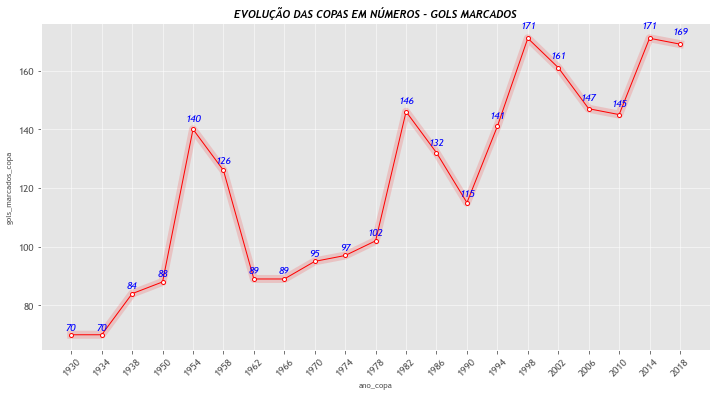

In [10]:
titulo_grafico = 'EVOLUÇÃO DAS COPAS EM NÚMEROS - GOLS MARCADOS'
valores = copas['gols_marcados_copa']
label = copas['ano_copa']

plt.figure(figsize=(12, 6))
plt.style.use('ggplot')
plt.tight_layout()
plt.title(titulo_grafico, fontsize=11, fontweight='bold', fontstyle='italic', fontfamily='trebuchet ms')
plt.xticks(rotation=45, fontsize=10, fontfamily='trebuchet ms')
plt.yticks(fontsize=10, fontfamily='trebuchet ms')
plt.xlabel(label.name, fontsize=8, fontfamily='trebuchet ms')
plt.ylabel(valores.name, fontsize=8, fontfamily='trebuchet ms')

plt.plot(label, valores, linewidth='8', color='red', alpha=0.15)

plt.plot(label,valores,
            color='red',
            linewidth='1',
            #linestyle='--',
            marker='o',
            markersize=4,
            mfc='white',
            mec='red')
plt.grid(axis='x', linewidth='0.5')
plt.grid(axis='y', linewidth='0.5')

for (i, valor) in enumerate(valores, start=0):
    plt.text(x=label[i],
                y=valor * 1.02,
                s=f'{valor}',
                ha='center',
                fontsize=10,
                color='blue',
                fontfamily='trebuchet ms',
                fontstyle='italic')
plt.show()

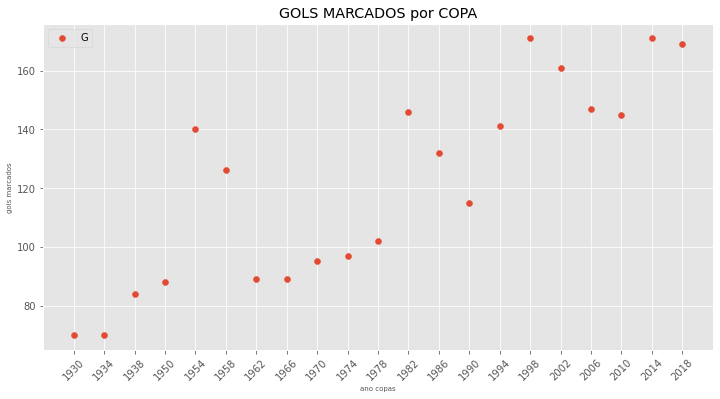

In [11]:
ano_copa = copas['ano_copa']
golMarcados = copas['gols_marcados_copa']

plt.figure(figsize=(12, 6))
plt.scatter(ano_copa,golMarcados)
plt.title('GOLS MARCADOS por COPA')
plt.xlabel('ano copas', fontsize=7)
plt.ylabel('gols marcados', fontsize=7)
plt.xticks(rotation=45)
plt.legend('Gols Marcados')
plt.show()

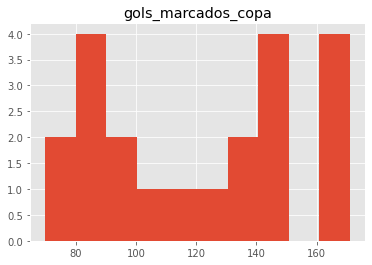

In [12]:
copas.hist(column='gols_marcados_copa')
plt.show()

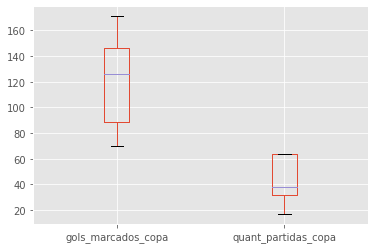

In [13]:
copas.boxplot(column=['gols_marcados_copa','quant_partidas_copa'])
plt.show()

In [14]:
golMarcados=copas['gols_marcados_copa'].sum()
print(golMarcados)

2548


In [ ]:
#fig = px.box(copas, x='campeao', y='gols_marcados_copa',points='all' , title='CORRELAÇÃO ENTRE CAMPEÕES x GOLS MARCADOS NAS COPAS CONQUISTADAS')
#fig.show()

In [ ]:
#tab_campeoes = (copas.groupby(by=['PAÍS CAMPEÃO']).sum()[['Conta']].sort_values(by='Conta'))
#fig_tab_campeoes = px.bar(
#    tab_campeoes,
#    x='Conta',
#    y=tab_campeoes.index,
#    orientation='h',
#    title='<b>Campeões das Copas</b>',
#    color_discrete_sequence=['#0083B8'] * len(tab_campeoes),
#    template='plotly_white',)
#plotly_chart(fig_tab_campeoes)

In [ ]:
#fig = px.box(df_partidas, x='fase_grupo', y='publico_partida', points='all', title='TOTAL DE GOLS DAS PARTIDAS por FASE - COPA DE ' +selected_copa)
#fig.show()

In [15]:
df_eventos = pd.read_csv('eventos.csv')
paises = pd.read_csv('country.csv')

df_eventos = pd.merge(df_eventos, paises[['cod_pais', 'bandeira_pais']], on=['cod_pais'], how='left')

df_eventos[['id_partida','cod_atleta', 'minuto']] = df_eventos[['id_partida', 'cod_atleta', 'minuto']] .astype('Int64')
df_eventos[['id_partida','cod_atleta', 'cod_pais']] = df_eventos[['id_partida','cod_atleta', 'cod_pais']] .astype(str)
df_eventos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42482 entries, 0 to 42481
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id_partida     42482 non-null  object
 1   cod_pais       42482 non-null  object
 2   escalado       42482 non-null  object
 3   num_camisa     42482 non-null  int64 
 4   cod_atleta     42482 non-null  object
 5   nome_atleta    42482 non-null  object
 6   img_atleta     713 non-null    object
 7   position       7303 non-null   object
 8   cod_evento     11099 non-null  object
 9   minuto         11100 non-null  Int64 
 10  bandeira_pais  42482 non-null  object
dtypes: Int64(1), int64(1), object(9)
memory usage: 3.9+ MB


In [16]:
eventos_ano_copa = pd.merge(df_eventos, partidas[['id_partida', 'ano_copa']], on=['id_partida'], how='left')
eventos_ano_copa = eventos_ano_copa.loc[eventos_ano_copa['ano_copa'] == selected_copa]
eventos_ano_copa

,id_partida,cod_pais,escalado,num_camisa,cod_atleta,nome_atleta,img_atleta,position,cod_evento,minuto,bandeira_pais,ano_copa
28715,300331503,16,S,1,7737,AKINFEEV,NaN,GK,NaN,<NA>,https://api.fifa.com/api/v3/picture/flags-sq-5...,2018
28716,300331503,16,S,2,7781,FERNANDES,NaN,DF,NaN,<NA>,https://api.fifa.com/api/v3/picture/flags-sq-5...,2018
28717,300331503,16,S,3,7782,KUTEPOV,NaN,DF,NaN,<NA>,https://api.fifa.com/api/v3/picture/flags-sq-5...,2018
28718,300331503,16,S,4,7739,IGNASHEVICH,NaN,DF,NaN,<NA>,https://api.fifa.com/api/v3/picture/flags-sq-5...,2018
28719,300331503,16,N,5,7767,SEMENOV,NaN,DF,NaN,<NA>,https://api.fifa.com/api/v3/picture/flags-sq-5...,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
42373,300331504,31,S,21,7262,VIDA,NaN,DF,Y,101,https://api.fifa.com/api/v3/picture/flags-sq-5...,2018
42389,300331504,16,S,8,7785,GAZINSKII,NaN,MF,Y,109,https://api.fifa.com/api/v3/picture/flags-sq-5...,2018
42407,300331498,35,S,13,7990,M. JÃ˜RGENSEN,NaN,DF,Y,115,https://api.fifa.com/api/v3/picture/flags-sq-5...,2018
42412,300331542,29,S,11,7368,CUADRADO,NaN,MF,Y,118,https://api.fifa.com/api/v3/picture/flags-sq-5...,2018


In [17]:
tb_eventos = pd.read_csv('tb_eventos.csv')
tb_eventos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   cod_evento    13 non-null     object
 1   desc_evento   13 non-null     object
 2   desc_evento2  10 non-null     object
 3   img_evento    13 non-null     object
dtypes: object(4)
memory usage: 544.0+ bytes


In [18]:
eventos = pd.merge(eventos_ano_copa, tb_eventos[['cod_evento', 'desc_evento', 'desc_evento2', 'img_evento']], on=['cod_evento'], how='left')
eventos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3074 entries, 0 to 3073
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id_partida     3074 non-null   object
 1   cod_pais       3074 non-null   object
 2   escalado       3074 non-null   object
 3   num_camisa     3074 non-null   int64 
 4   cod_atleta     3074 non-null   object
 5   nome_atleta    3074 non-null   object
 6   img_atleta     70 non-null     object
 7   position       3074 non-null   object
 8   cod_evento     406 non-null    object
 9   minuto         407 non-null    Int64 
 10  bandeira_pais  3074 non-null   object
 11  ano_copa       3074 non-null   object
 12  desc_evento    406 non-null    object
 13  desc_evento2   396 non-null    object
 14  img_evento     406 non-null    object
dtypes: Int64(1), int64(1), object(13)
memory usage: 387.3+ KB


In [19]:
#pega marcadores
marcadores = eventos[(eventos['cod_evento'] == 'G') | (eventos['cod_evento'] == 'P')]
marcadores['gols'] = 1
marcadores

C:\Users\manoe\AppData\Local\Temp\ipykernel_28656\4270822829.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marcadores['gols'] = 1


,id_partida,cod_pais,escalado,num_camisa,cod_atleta,nome_atleta,img_atleta,position,cod_evento,minuto,bandeira_pais,ano_copa,desc_evento,desc_evento2,img_evento,gols
2667,300331498,35,S,13,7990,M. JÃ˜RGENSEN,NaN,DF,G,1,https://api.fifa.com/api/v3/picture/flags-sq-5...,2018,Goal,Goal,https://images.vexels.com/media/users/3/158409...,1
2668,300331511,64,S,7,7088,Cristiano RONALDO,https://pbs.twimg.com/media/E-Oi7i1XIAcg5WT.jpg,FW,G,4,https://api.fifa.com/api/v3/picture/flags-sq-5...,2018,Goal,Goal,https://images.vexels.com/media/users/3/158409...,1
2669,300331536,22,S,15,8217,MEUNIER,NaN,DF,G,4,https://api.fifa.com/api/v3/picture/flags-sq-5...,2018,Goal,Goal,https://images.vexels.com/media/users/3/158409...,1
2670,300331498,31,S,17,8056,MANDÅ½UKIÄ†,NaN,FW,G,4,https://api.fifa.com/api/v3/picture/flags-sq-5...,2018,Goal,Goal,https://images.vexels.com/media/users/3/158409...,1
2671,300331524,64,N,7,7088,Cristiano RONALDO,https://pbs.twimg.com/media/E-Oi7i1XIAcg5WT.jpg,FW,G,4,https://api.fifa.com/api/v3/picture/flags-sq-5...,2018,Goal,Goal,https://images.vexels.com/media/users/3/158409...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2836,300331495,38,S,10,7828,M SALAH,NaN,FW,P,73,https://api.fifa.com/api/v3/picture/flags-sq-5...,2018,Penalty goal,Goal,https://images.vexels.com/media/users/3/249281...,1
2837,300331510,47,S,10,8028,G. SIGURDSSON,NaN,MF,P,76,https://api.fifa.com/api/v3/picture/flags-sq-5...,2018,Penalty goal,Goal,https://images.vexels.com/media/users/3/249281...,1
3055,300331504,31,S,21,7262,VIDA,NaN,DF,G,101,https://api.fifa.com/api/v3/picture/flags-sq-5...,2018,Goal,Goal,https://images.vexels.com/media/users/3/158409...,1
3056,300331522,31,S,17,8056,MANDÅ½UKIÄ†,NaN,FW,G,109,https://api.fifa.com/api/v3/picture/flags-sq-5...,2018,Goal,Goal,https://images.vexels.com/media/users/3/158409...,1


In [20]:
artilheiros = marcadores.groupby('cod_atleta')['cod_atleta'].count()
artilheiros.info()

<class 'pandas.core.series.Series'>
Index: 111 entries, 1162 to 8351
Series name: cod_atleta
Non-Null Count  Dtype
--------------  -----
111 non-null    int64
dtypes: int64(1)
memory usage: 1.7+ KB


In [21]:
#os artilheiros
artilheiros = marcadores.groupby(by=['nome_atleta', 'img_atleta', 'bandeira_pais']).sum()[['gols']].sort_values(['gols'], ascending=False)
artilheiros = artilheiros.reset_index()

artilheiros = artilheiros.rename(columns={'img_atleta': 'img', 'bandeira_pais': 'img'})
def path_to_image_html(path):
    return '<img src="'+ path + '" width="50" >'

HTML(artilheiros.to_html(escape=False, formatters=dict(img=path_to_image_html)))

C:\Users\manoe\AppData\Local\Temp\ipykernel_28656\665158845.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  artilheiros = marcadores.groupby(by=['nome_atleta', 'img_atleta', 'bandeira_pais']).sum()[['gols']].sort_values(['gols'], ascending=False)


,nome_atleta,img,img,gols
0,Herry KANE,,,6
1,Kylian MBAPPE,,,6
2,Antoine GRIEZMANN,,,5
3,CHERYSHEV,,,4
4,Cristiano RONALDO,,,4
5,Romelu LUKAKU,,,4
6,NEYMAR JR,,,2
7,Lionel MESSI,,,1
